<a href="https://colab.research.google.com/github/Nostal1ga/9417_Team_assignment/blob/main/notebook/9417_asV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imports
import gdown
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
url = "https://drive.google.com/drive/folders/1aulFmTOH2YDHAUsclBRdcEQCgxslKbh2"
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/9417_data/X_test.npy',
 '/content/9417_data/X_train.npy',
 '/content/9417_data/y_train.npy']

In [4]:
#read_data
x_test_path = '/content/9417_data/X_test.npy'
y_train_path = '/content/9417_data/y_train.npy'
x_train_path = '/content/9417_data/X_train.npy'

# Load the data
X_train = np.load(x_train_path)
y_train = np.load(y_train_path)
X_test = np.load(x_test_path)

In [5]:
def analyze_data(X_train, X_test, y_train):
    analysis = {
        "X_train_shape": X_train.shape,
        "X_test_shape": X_test.shape,
        "y_train_shape": y_train.shape,
        "X_train_missing_values": np.isnan(X_train).sum(),
        "X_test_missing_values": np.isnan(X_test).sum(),
        "y_train_missing_values": np.isnan(y_train).sum(),
    }
    return analysis

# Perform the analysis
analysis_result = analyze_data(X_train, X_test, y_train)
analysis_result

{'X_train_shape': (1000, 111),
 'X_test_shape': (700, 111),
 'y_train_shape': (1000, 11),
 'X_train_missing_values': 9450,
 'X_test_missing_values': 6524,
 'y_train_missing_values': 0}

In [6]:
features_summary = pd.DataFrame(X_train).describe().transpose()
features_summary

,count,mean,std,min,25%,50%,75%,max
0,995.0,65.179899,11.492400,34.0,57.0,66.0,73.0,97.0
1,1000.0,3.657000,1.825564,0.0,2.0,3.0,5.0,13.0
2,998.0,0.444890,0.816375,0.0,0.0,0.0,1.0,3.0
3,933.0,2.260450,2.479035,0.0,0.0,1.0,5.0,6.0
4,954.0,1.190776,1.053291,0.0,0.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...
106,995.0,0.407035,0.491529,0.0,0.0,0.0,1.0,1.0
107,992.0,0.428427,0.495100,0.0,0.0,0.0,1.0,1.0
108,992.0,0.444556,0.497167,0.0,0.0,0.0,1.0,1.0
109,993.0,0.011078,0.104718,0.0,0.0,0.0,0.0,1.0


In [7]:
#data cleaning using KNN for numerical features
# KNN Imputer initialization
knn_imputer = KNNImputer(n_neighbors=5)
# Impute missing values in X_train
X_train_imputed_knn = knn_imputer.fit_transform(X_train)
X_test_imputed_knn = knn_imputer.transform(X_test)
X_train_imputed_knn_missing_values = np.isnan(X_train_imputed_knn).sum()
X_test_imputed_knn_missing_values = np.isnan(X_test_imputed_knn).sum()

X_train_imputed_knn_missing_values, X_test_imputed_knn_missing_values

(0, 0)

In [8]:
#apply normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed_knn)
X_test_scaled = scaler.transform(X_test_imputed_knn)

In [9]:
import numpy as np
import xgboost as xgb

# Assuming X_train_scaled and y_train are already defined
feature_names = [str(i) for i in range(X_train_scaled.shape[1])]  # Example feature names

# Placeholder for storing top 10 features for each target
top_10_features_per_target = {}

for i in range(y_train.shape[1]):  # Loop through each target variable
    y_current = y_train[:, i]
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train_scaled, y_current)
    importances = model.feature_importances_

    # Get indices of the top 10 features
    top_10_indices = np.argsort(importances)[-10:]
    top_10_features = [feature_names[index] for index in top_10_indices]

    # Store the top 10 features for the current target variable
    top_10_features_per_target[f'Target_{i+1}'] = top_10_features

# Print the top 10 predictive features for each target variable
for target, features in top_10_features_per_target.items():
    print(f"{target}: {features}")

Target_1: ['98', '56', '52', '28', '92', '53', '11', '29', '91', '73']
Target_2: ['91', '46', '37', '81', '30', '38', '68', '56', '76', '73']
Target_3: ['105', '101', '73', '98', '39', '10', '56', '76', '102', '25']
Target_4: ['95', '33', '91', '56', '2', '37', '7', '102', '10', '52']
Target_5: ['101', '33', '10', '110', '2', '49', '29', '91', '105', '59']
Target_6: ['85', '84', '25', '4', '101', '38', '2', '39', '73', '29']
Target_7: ['91', '110', '7', '84', '25', '56', '68', '57', '10', '52']
Target_8: ['109', '71', '53', '2', '90', '91', '50', '46', '92', '39']
Target_9: ['48', '39', '96', '28', '8', '73', '46', '10', '25', '29']
Target_10: ['33', '10', '49', '100', '81', '92', '45', '67', '91', '110']
Target_11: ['102', '68', '46', '100', '28', '2', '52', '110', '97', '91']


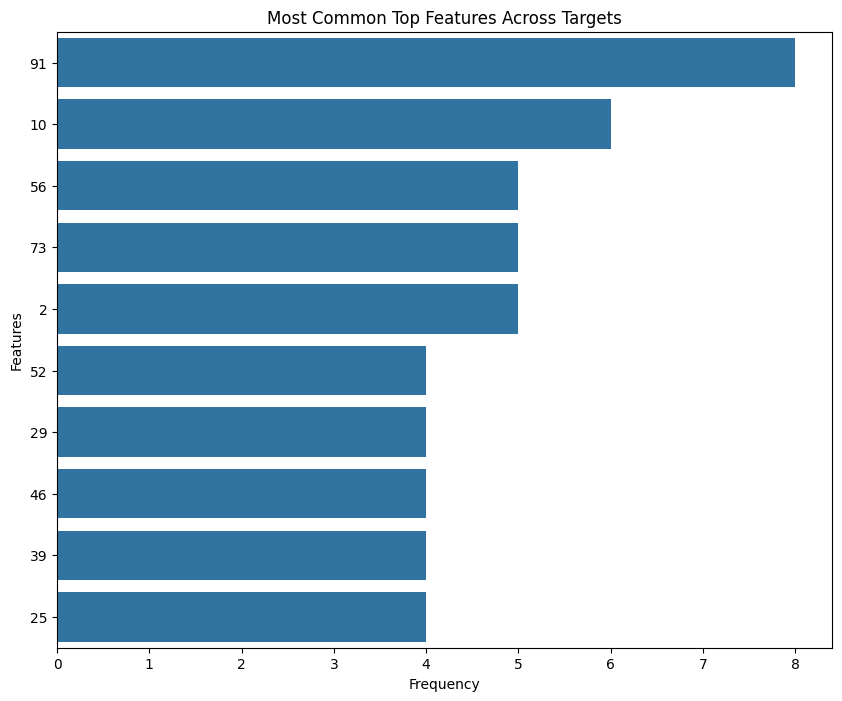

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the list of all top features across targets
all_top_features = [feature for features_list in top_10_features_per_target.values() for feature in features_list]

feature_frequency = Counter(all_top_features)

# Plot the most common features
common_features, frequencies = zip(*feature_frequency.most_common(10))
plt.figure(figsize=(10, 8))

# Corrected barplot call
sns.barplot(x=list(frequencies), y=list(common_features))
plt.title('Most Common Top Features Across Targets')
plt.xlabel('Frequency')
plt.ylabel('Features')
plt.show()

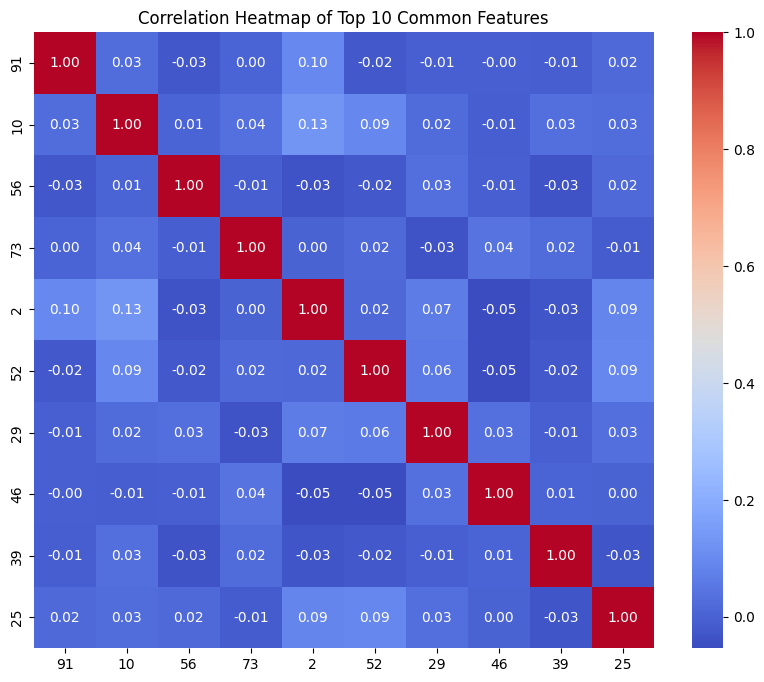

In [11]:
# Convert common_features to integer indices if they are not already
common_feature_indices = [int(feature) for feature in common_features]

# Use these indices to select the columns from X_train_scaled
X_top_10_common = X_train_scaled[:, common_feature_indices]


X_top_10_common_df = pd.DataFrame(X_top_10_common, columns=common_features)

# Now calculate the correlation matrix for these features
corr_matrix_top_10 = X_top_10_common_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_top_10, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top 10 Common Features')
plt.show()

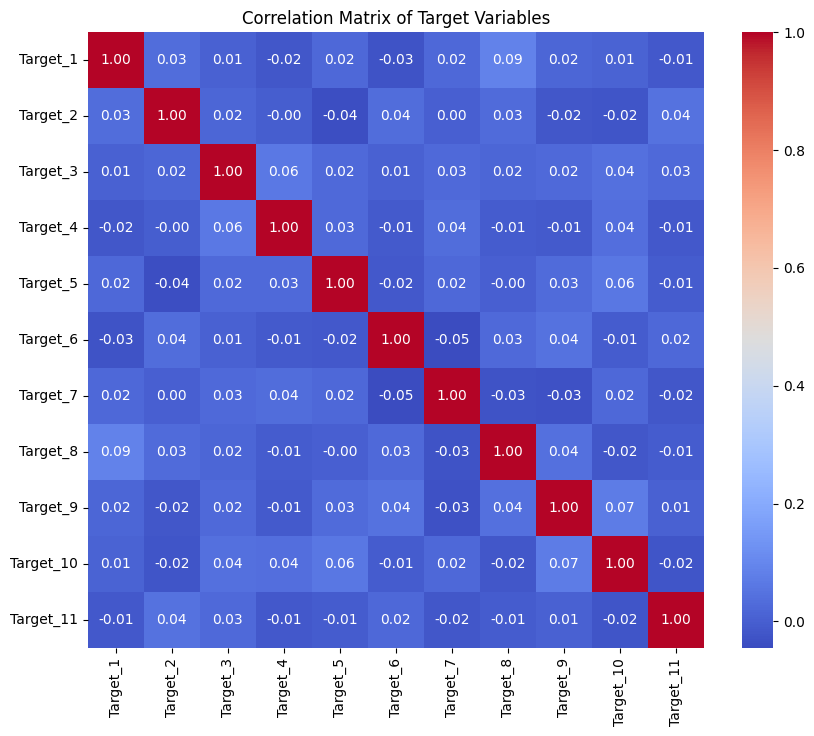

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_train is a NumPy array of your target variables
y_train_df = pd.DataFrame(y_train, columns=[f'Target_{i}' for i in range(1, 12)])

# Compute the correlation matrix
corr_matrix = y_train_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix of Target Variables")
plt.show()

In [14]:
def analyze_feature_types(data):
    binary_features = []
    categorical_features = []
    continuous_features = []

    for i in range(data.shape[1]):
        unique_values = np.unique(data[:, i])
        num_unique_values = len(unique_values)

        # Criteria for classifying the feature types
        if num_unique_values == 2:
            binary_features.append(i)
        elif num_unique_values > 2 and num_unique_values < 20:
            categorical_features.append(i)
        else:
            continuous_features.append(i)

    return {
        'binary_features': binary_features,
        'categorical_features': categorical_features,
        'continuous_features': continuous_features
    }

feature_types = analyze_feature_types(X_train)

def format_feature_types_output(feature_types):
    output = []
    output.append("Binary Features: " + ", ".join(map(str, feature_types['binary_features'])))
    output.append("Categorical Features: " + ", ".join(map(str, feature_types['categorical_features'])))
    output.append("Continuous Features: " + ", ".join(map(str, feature_types['continuous_features'])))
    return "  ".join(output)

formatted_output = format_feature_types_output(feature_types)
formatted_output

'Binary Features: 6, 12, 16, 18, 21, 23, 31, 47, 51, 61, 66, 77, 80  Categorical Features: 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19, 20, 22, 24, 25, 26, 27, 28, 29, 30, 32, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 81, 87, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110  Continuous Features: 0, 33, 34, 35, 36, 82, 83, 84, 85, 86, 88, 89, 90'

In [15]:
#data cleaning using KNN for numerical features
# KNN Imputer initialization
knn_imputer = KNNImputer(n_neighbors=5)
# Impute missing values in X_train
X_train_imputed_knn = knn_imputer.fit_transform(X_train)
X_test_imputed_knn = knn_imputer.transform(X_test)
X_train_imputed_knn_missing_values = np.isnan(X_train_imputed_knn).sum()
X_test_imputed_knn_missing_values = np.isnan(X_test_imputed_knn).sum()

X_train_imputed_knn_missing_values, X_test_imputed_knn_missing_values

(0, 0)

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Preparing encoders for categorical and continuous features
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
standard_scaler = StandardScaler()

# Fit the encoders on the training data
# Note: To transform categorical features using one-hot encoding, we need to fit the encoder
categorical_data = X_train_imputed_knn[:, feature_types['categorical_features']]
onehot_encoder.fit(categorical_data)

# Standardization is applied only to continuous features
continuous_data = X_train_imputed_knn[:, feature_types['continuous_features']]
standard_scaler.fit(continuous_data)

# Function to preprocess the data
def preprocess_data(data, feature_types, onehot_encoder, standard_scaler):
    # Extracting feature types
    binary_data = data[:, feature_types['binary_features']]
    categorical_data = data[:, feature_types['categorical_features']]
    continuous_data = data[:, feature_types['continuous_features']]

    # Apply one-hot encoding to categorical features
    encoded_categorical_data = onehot_encoder.transform(categorical_data)

    # Apply standardization to continuous features
    standardized_continuous_data = standard_scaler.transform(continuous_data)

    # Concatenate all preprocessed features
    preprocessed_data = np.hstack([binary_data, encoded_categorical_data, standardized_continuous_data])

    return preprocessed_data

# Preprocess both training and test data
X_train_preprocessed = preprocess_data(X_train_imputed_knn, feature_types, onehot_encoder, standard_scaler)
X_test_preprocessed = preprocess_data(X_test_imputed_knn, feature_types, onehot_encoder, standard_scaler)

X_train_preprocessed.shape, X_test_preprocessed.shape

((1000, 518), (700, 518))

In [17]:
from tensorflow.keras.models import Sequential
from sklearn.metrics import hamming_loss
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
import tensorflow as tf
import keras
from sklearn.cross_decomposition import CCA
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
from tensorflow.keras.callbacks import EarlyStopping


transformed_features_list = []

# Perform CCA for each label separately
for i in range(y_train.shape[1]):  # For each label
    cca = CCA(n_components=1)  # Using 1 component for simplicity; adjust as needed
    # Fit CCA: Note, y_train[:, i:i+1] makes the label 2D which is expected by CCA
    cca.fit(X_train_preprocessed, y_train[:, i:i+1])
    # Transform the features and add them to the list
    X_c = cca.transform(X_train_preprocessed)
    transformed_features_list.append(X_c)

# Combine the transformed features from each label into a single feature set
X_transformed = np.hstack(transformed_features_list)

X_train_scaled_partition, X_val_scaled_partition, Y_train, Y_val = train_test_split(
    X_transformed, y_train, test_size=0.2, random_state=42)

# Define the Neural Network architecture

def build_model(input_dim, output_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(64),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(output_dim, activation='sigmoid')  # Assuming binary classification for each label
    ])
    return model

# Prepare the model
input_dim = X_train_scaled_partition.shape[1]
output_dim = Y_train.shape[1]  # Assuming y_train is not one-hot encoded
model = build_model(input_dim, output_dim)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.03)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping and learning rate reduction on plateau
model.fit(
    X_train_scaled_partition, Y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val_scaled_partition, Y_val),
    callbacks=[early_stopping],
    verbose=2
)

y_pred_proba_nn = model.predict(X_val_scaled_partition)

threshold = 0.5
y_pred_nn = (y_pred_proba_nn > threshold).astype(int)
hamming_loss_nn = hamming_loss(Y_val, y_pred_nn)
hamming_score_nn = 1 - hamming_loss_nn

# Since we directly get probabilities, we can calculate log loss as follows
log_loss_nn = tf.keras.losses.binary_crossentropy(Y_val, y_pred_proba_nn)
average_log_loss_nn = np.mean(log_loss_nn)

print("Neural Network Hamming Score:", hamming_score_nn)
print("Neural Network Average Binary Cross-Entropy Loss:", average_log_loss_nn)

Epoch 1/100
13/13 - 5s - loss: 0.5701 - binary_accuracy: 0.7205 - val_loss: 0.5036 - val_binary_accuracy: 0.8086 - 5s/epoch - 395ms/step
Epoch 2/100
13/13 - 0s - loss: 0.4803 - binary_accuracy: 0.7739 - val_loss: 0.4430 - val_binary_accuracy: 0.8195 - 399ms/epoch - 31ms/step
Epoch 3/100
13/13 - 0s - loss: 0.4662 - binary_accuracy: 0.7840 - val_loss: 0.4148 - val_binary_accuracy: 0.8350 - 374ms/epoch - 29ms/step
Epoch 4/100
13/13 - 0s - loss: 0.4469 - binary_accuracy: 0.7986 - val_loss: 0.4000 - val_binary_accuracy: 0.8273 - 278ms/epoch - 21ms/step
Epoch 5/100
13/13 - 0s - loss: 0.4380 - binary_accuracy: 0.8010 - val_loss: 0.3862 - val_binary_accuracy: 0.8336 - 479ms/epoch - 37ms/step
Epoch 6/100
13/13 - 0s - loss: 0.4395 - binary_accuracy: 0.7960 - val_loss: 0.3868 - val_binary_accuracy: 0.8323 - 310ms/epoch - 24ms/step
Epoch 7/100
13/13 - 0s - loss: 0.4403 - binary_accuracy: 0.7949 - val_loss: 0.3820 - val_binary_accuracy: 0.8259 - 220ms/epoch - 17ms/step
Epoch 8/100
13/13 - 0s - loss

In [18]:
from sklearn.cross_decomposition import CCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, log_loss, hamming_loss
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
import numpy as np


transformed_features_list = []
# Perform CCA for each label separately
for i in range(y_train.shape[1]):  # For each label
    cca = CCA(n_components=1)  # Using 1 component for simplicity; adjust as needed
    # Fit CCA: Note, y_train[:, i:i+1] makes the label 2D which is expected by CCA
    cca.fit(X_train_preprocessed, y_train[:, i:i+1])
    # Transform the features and add them to the list
    X_c = cca.transform(X_train_preprocessed)
    transformed_features_list.append(X_c)

# Combine the transformed features from each label into a single feature set
X_transformed = np.hstack(transformed_features_list)

X_train_scaled_partition, X_val_scaled_partition, Y_train, Y_val = train_test_split(
    X_transformed, y_train, test_size=0.2, random_state=42)

base_estimator = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
chain_clf_xgb = ClassifierChain(base_estimator, order='random', random_state=0)

param_grid_xgb = {
    'base_estimator__n_estimators': [100, 200],
    'base_estimator__max_depth': [6, 10, None],
    'base_estimator__learning_rate': [0.01, 0.1]
}

grid_search_xgb = GridSearchCV(chain_clf_xgb, param_grid_xgb, cv=5, scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))
grid_search_xgb.fit(X_train_scaled_partition, Y_train)

best_model_xgb = grid_search_xgb.best_estimator_
y_pred_proba_xgb = best_model_xgb.predict_proba(X_val_scaled_partition)
y_val_pred_xgb = best_model_xgb.predict(X_val_scaled_partition)

average_log_loss_xgb = np.mean([log_loss(Y_val[:, i], y_pred_proba_xgb[:, i]) for i in range(Y_val.shape[1])])
hamming_xgb = hamming_loss(Y_val, y_val_pred_xgb)
hamming_score_xgb = 1 - hamming_xgb

print("XGBoost Hamming Score:", hamming_score_xgb)
print("XGBoost Average Binary Cross-Entropy Loss:", average_log_loss_xgb)

XGBoost Hamming Score: 0.8540909090909091
XGBoost Average Binary Cross-Entropy Loss: 0.35185785774141914


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, hamming_loss, log_loss

transformed_features_list = []
# Perform CCA for each label separately
for i in range(y_train.shape[1]):  # For each label
    cca = CCA(n_components=1)  # Using 1 component for simplicity; adjust as needed
    # Fit CCA: Note, y_train[:, i:i+1] makes the label 2D which is expected by CCA
    cca.fit(X_train_preprocessed, y_train[:, i:i+1])
    # Transform the features and add them to the list
    X_c = cca.transform(X_train_preprocessed)
    transformed_features_list.append(X_c)

# Combine the transformed features from each label into a single feature set
X_transformed = np.hstack(transformed_features_list)

X_train_scaled_partition, X_val_scaled_partition, Y_train, Y_val = train_test_split(
    X_transformed, y_train, test_size=0.2, random_state=42)

#use rf
# Initialize Classifier Chain with a base estimator
base_estimator = RandomForestClassifier()
chain_clf = ClassifierChain(base_estimator, order='random', random_state=0)

# Hyperparameter tuning
param_grid = {
    'base_estimator__n_estimators': [50, 100, 200],
    'base_estimator__max_depth': [10, 20, None]
}
grid_search = GridSearchCV(chain_clf, param_grid, cv=5, scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))

# Fit the model on the scaled data, not the PCA-transformed data
grid_search.fit(X_train_scaled_partition, Y_train)

# Evaluate the model using the scaled validation data
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_val_scaled_partition)
y_val_pred = best_model.predict(X_val_scaled_partition)

# Calculate the log_loss for each label and then take the average
average_log_loss = np.mean([log_loss(Y_val[:, i], y_pred_proba[:, i]) for i in range(Y_val.shape[1])])
hamming = hamming_loss(Y_val, y_val_pred)
hamming_score = 1 - hamming
print("Hamming Score:", hamming_score)
print("Average Binary Cross-Entropy Loss:", average_log_loss)


Hamming Score: 0.855909090909091
Average Binary Cross-Entropy Loss: 0.3609000536802815
